# 탐색적 데이터 분석(EDA)
* EDA는 모델링에 앞서 데이터를 살피는 모든 과정을 의미한다.
* 데이터를 분석하기 전에 통계적으로 해석하거나 그래프츨 그려 시각화하고 데이터를 직관화하는 과정을 말한다.
* 정리해보면 데이터를 평균,분산,표준편차 등 과 시각화를 통해 다양한 방면으로 분석하는 것이라 할 수 있다.

## 탐색적 데이터 분석을 잘하려면
* RAW DATA의 Description, dictionary를 통해 데이터의 각 column들과 row의 의미를 이해
    * dict.keys()나 데이터의 각 칼럼과 로우에 대한 설명등이 있으면 읽기
* 결측치 처리 및 데이터필터링을 할 수 있어야 한다.
    * 원핫인코딩이나 레이블 인코딩을 사용
* 데이터를 시각화 할 수 있어야 한다.
    * 데이터의 분포나 상관관계, 이상치 데이터를 분석하는데 용이

## 탐색적 데이터 분석 과정
* 분석의 목적과 변수가 무엇이 있는지 확인, 개별 변수의 이름이나 설명을 가지는지 확인
* 데이터를 전체적으로 살펴보기
* 데이터의 개별속성값을 관찰
* 속성 간의 관계에 초점을 맞추어, 개별 속성 관찰에서 찾아내지 못했던 패턴을 발견 (상관관계, 시각화 등)

## 속성 간의 관계 분석
* 질적 변수: 변수의 값이 자료를 특정 카테고리에 포함 시키도록 하는 변수를 의미
    * 명목형 데이터: 성별,성공여부,혈액형 등 단순히 분류된 데이터
    * 순서형 데이터: 개개의 값들이 이산적이며 그들 사이에 순서가 존재하는 데이터

* 양적 변수: 변수의 값을 숫자로 나타낼 수 있는 변수를 의미
    * 연속형 데이터:연속적인 값을 갖는 데이터로 신장,체중 등을 의미
    * 이산형 데이터: 이산적인 값을 갖는 데이터

## 데이터 조합 별 통계 및 시각화 방법
* categorical - categorical
    * 교차 테이블, 모자이크 플롯을 이용해 각 속성 값의 쌍에 해당하는 값 개수를 표시

* numeric - categorical
    * 각 카테고리별 통계 값(평균,중간값) 을 관찰할 수 있다. 이를 박스 플롯을 통해 시각적으로 표시

* numeric - numeric
    * 상관계수를 통해 두 속성 간의 연관성을 나타낼 수 있다. 스케터 플롯을 이용하여 시각적으로 표시

## 결측치 처리
* 데이터가 누란 된 이유를 이해하는 것은 나머지 데이터를 올바르게 처리하는 데 중요하다.

### 결측 데이터의 종류
* 완전 무작위 결측
    * 변수 상에서 발생한 결측치가 다른 변수들과 아무런 상관이 없는 경우
    * 데이터를 입력하는 사람이 입력을 안했다던지 전산오류로 누락된 경우 등
    * 이러한 결측치는 보통 제거하거나 무작위 표본추출을 통해 완벽한 데이터셋으로 만듬
    
* 무작위 결측
    * 누락된 자료가 특정 변수와 관련되어 일어나지만, 그 변수의 결과는 관계가 없는 경우
    * 예를 들어, 남성은 우울증 설문 조사에 기입 할 확률이 적지만 우울함의 정도와는 상관이 없는 경우

* 비 무작위 결측
    * 위의 두가지 유형이 아닌 경우
    * 위의 예시에서 만약 남성이 우울증 설문 조사에 기입하는게 우울증의 정도와 관련이 있다면 이것은 비 무작위 결측이다.

## 결측 데이터의 비율에 따른 처리 방법
* 결측치 비율 10% 미만
    * 제거(dropna(), drop()) 함수 사용
    * 채우기: 평균,중앙값,최빈값 등으로 채움.(fillna(), replace(), interpolate() 함수 사용)
    
* 결측치 비율 10% 이상 20% 미만
    * hot deck: 가장 많은 값으로 채우기
    * regression: 회귀 예측으로 값을 채우기
    * model based method: 모델을 기반으로 구한 값으로 채우기

* 결측치 비율 20% 이상
    * model based method
    * regression

# 타이타닉 데이터 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 무시함

In [5]:
df_train = pd.read_csv('../../DataAnalysis/titanic/train.csv')
df_test = pd.read_csv('../../DataAnalysis/titanic/test.csv')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [12]:
df_train[df_train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [13]:
df_train[df_train['Fare'] == 0] #직원

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


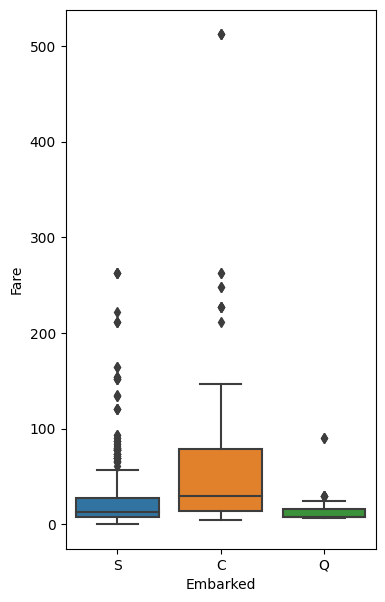

In [17]:
import seaborn as sns

plt.figure(figsize=(4, 7))
sns.boxplot(x='Embarked', y='Fare',data=df_train)
plt.show()

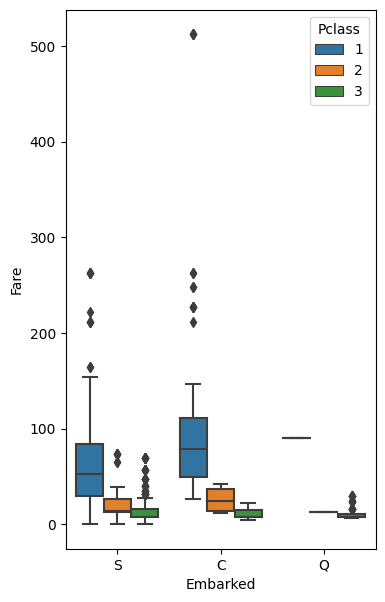

In [22]:
plt.figure(figsize=(4,7))
plt.grid(False)
sns.boxplot(x = 'Embarked', y = 'Fare',hue= 'Pclass' ,data = df_train)
plt.show()

In [23]:
total = df_train.isnull().sum().sort_values(ascending=False) # 결측데이터의 갯수
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [24]:
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) #결측데이터 퍼센트
percent

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [25]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


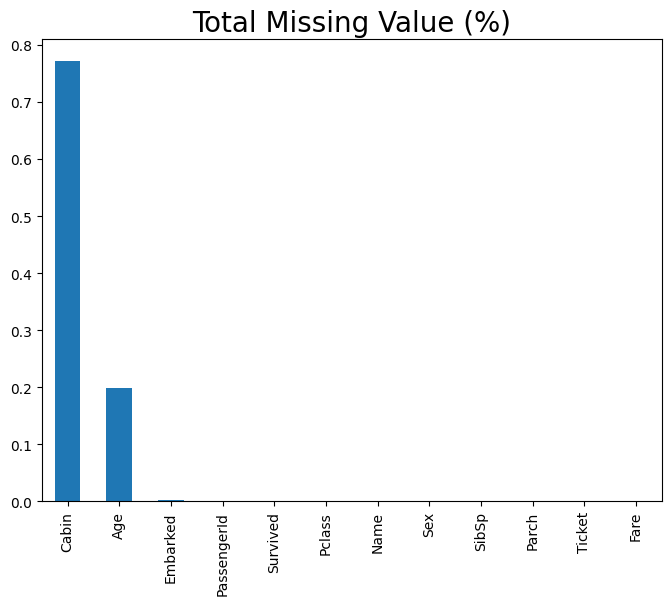

In [29]:
percent_data = percent
percent_data.plot(kind='bar', figsize = (8,6), fontsize = 10)
plt.grid(False)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Correlation with Missing Values')

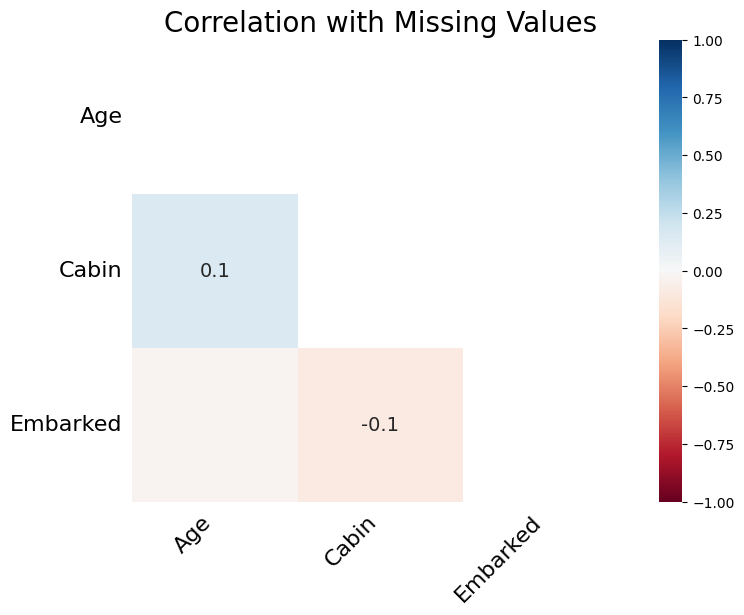

In [30]:
import missingno as msno

missingdata_df = df_train.columns[df_train.isnull().any()].tolist()

msno.heatmap(df_train[missingdata_df], figsize=(8,6)) #상관관계 표시

plt.title("Correlation with Missing Values", fontsize = 20)

Text(0.5, 1.0, 'Correlation with Missing Values')

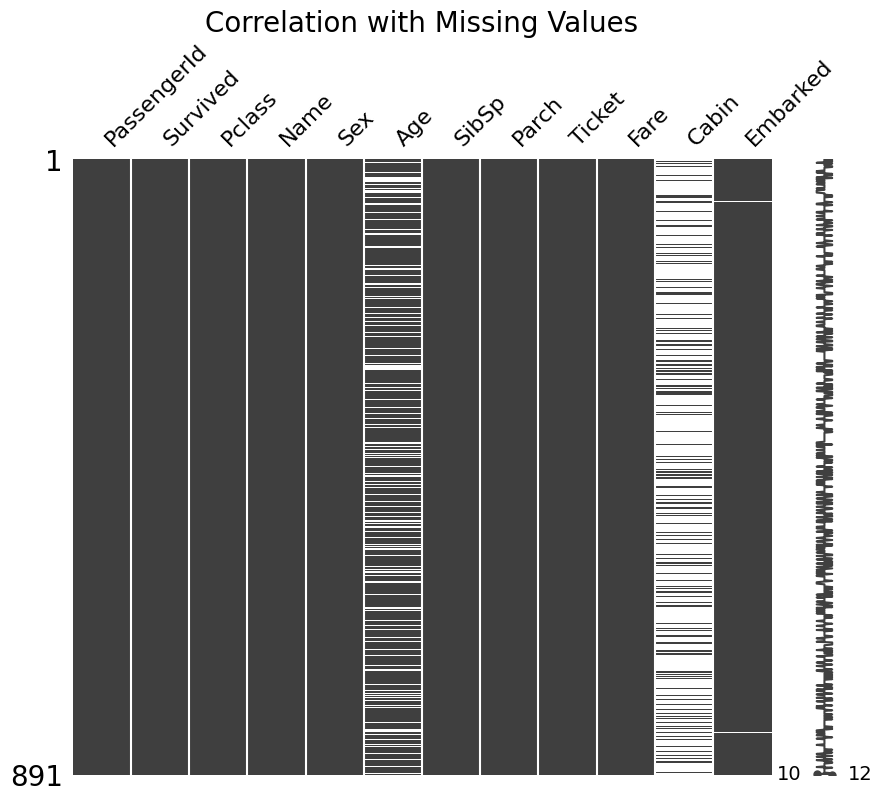

In [35]:
msno.matrix(df_train, figsize=(10,8)) # 전체 데이터
plt.title("Correlation with Missing Values", fontsize = 20)


Text(0.5, 1.0, 'Correlation with Missing Values')

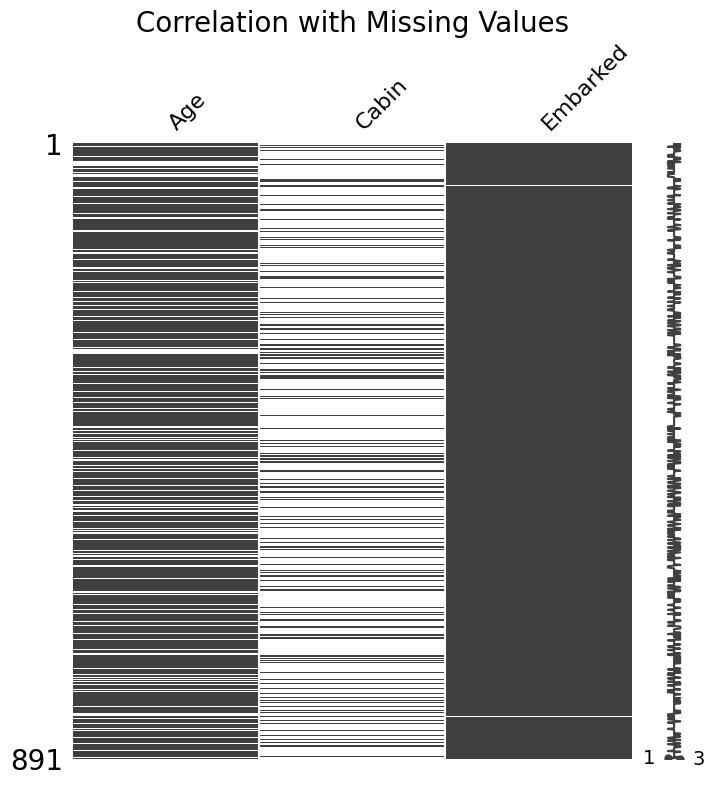

In [34]:
missingdata_df = df_train.columns[df_train.isnull().any()].tolist() # 결측데이터(컬럼)만 추출

msno.matrix(df_train[missingdata_df], figsize=(8,8))

plt.title("Correlation with Missing Values", fontsize = 20)

Text(0.5, 1.0, 'Correlation with Missing Values')

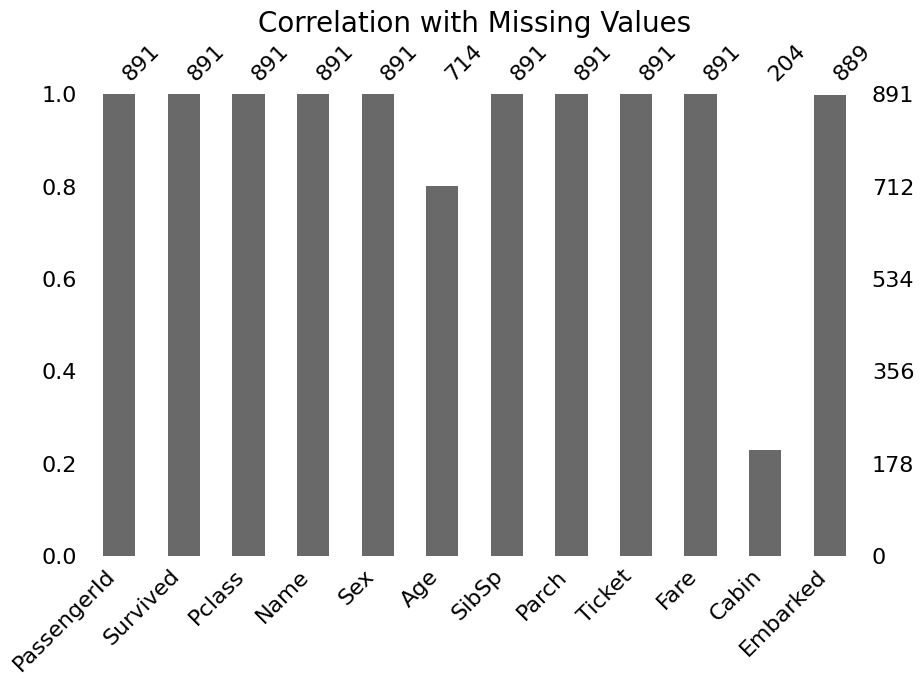

In [37]:
msno.bar(df_train, figsize=(10,6))

plt.title("Correlation with Missing Values", fontsize = 20)


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer( strategy='mean') #'median'을 쓰면 중앙값사용

imp_mean.fit(df_train[['Age']])

df_imputed = pd.DataFrame(imp_mean.transform(df_train[['Age']]), columns={'Age'})
df_imputed


,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [40]:
imp_mean = SimpleImputer(strategy='most_frequent') 
imp_mean.fit(df_train[['Embarked']])
df_imputed = pd.DataFrame(imp_mean.transform(df_train[['Embarked']]), columns={'Embarked'})
df_imputed

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [45]:
from impyute.imputation.cs import mice # pip install impyute

df_train_num = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) #수치가 아닌 데이터 전부 제거

np_imputed = mice(df_train_num.values) # mice 학습시작

df_imputed = pd.DataFrame(np_imputed, columns=['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare'])

df_imputed

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,0.0,3.0,23.457198,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000


# 타이타닉 데이터 실습2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df_train = pd.read_csv('../../DataAnalysis/titanic/train.csv')
df_test = pd.read_csv('../../DataAnalysis/titanic/test.csv')

In [6]:
train_df_copy = df_train.drop(['Survived'], axis=1) #데이터의 쉬운 가공을 위해서 train 과 test 데이터를 합쳐주고 Survived 는 삭제해준다.

total_set = pd.concat([train_df_copy,df_test ])
train_data = df_train.copy()

total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
total_set.isnull().sum() #isnull() null값이 있으면 true 없으면 false를 반환
total_set.isnull().sum() / len(total_set) #len(total_set)은 레코드의 갯수(1309개)


# Cabin 의 Null Data percentage 가 77퍼센트이기 때문에, 이 열은 drop 한다.
total_set.drop('Cabin', axis=1, inplace=True)
total_set.head()

train_data.drop('Cabin', axis=1, inplace=True)
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
total_set.isnull().sum()/ len(total_set)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Embarked       0.001528
dtype: float64

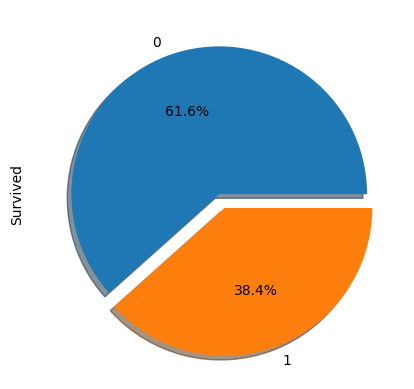

In [11]:
#전체 생존률
df_train["Survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
#explode = 파이의 원점에서 튀어나온 정도
#autopct = 각 항목의 퍼센트
plt.show()

In [13]:
len(df_train.loc[ (df_train["Sex"]=='male') & (df_train["Survived"]==1)]) / len(df_train.loc[ 
(df_train["Sex"]=='male') ]) 
#생존자중 성별이 남자인 사람 / 성별이 남자인 사람

0.18890814558058924

In [14]:
len(df_train.loc[ (df_train["Sex"]=='female') & (df_train["Survived"]==1)]) / len(df_train.loc[ 
(df_train["Sex"]=='female') ]) 
#생존자중 성별이 여자인 사람 / 성별이 여자인 사람

0.7420382165605095

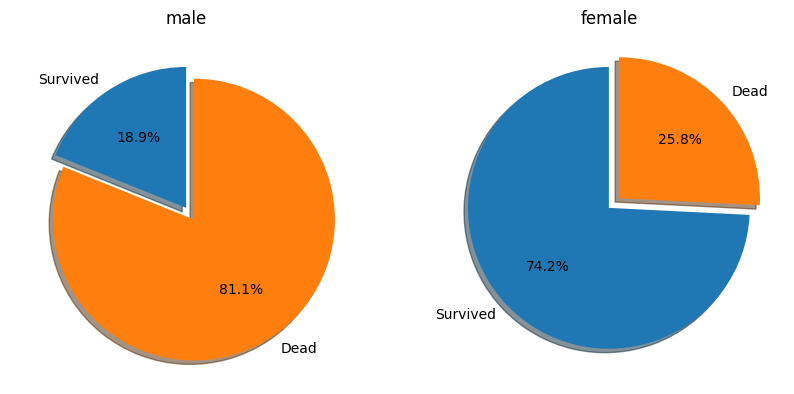

In [58]:
labels = 'Survived', 'Dead'
sizes_m = [len(df_train.loc[ (df_train["Sex"]=='male') & (df_train["Survived"]==1)]),
           len(df_train.loc[ (df_train["Sex"]=='male')& (df_train["Survived"]==0)]) ]

sizes_f = [len(df_train.loc[ (df_train["Sex"]=='female') & (df_train["Survived"]==1)]),
           len(df_train.loc[ (df_train["Sex"]=='female')& (df_train["Survived"]==0)]) ]
explode = (0, 0.1) 

fig = plt.figure()
fig.set_size_inches(10,5)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male') 
ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female') 
plt.show()


In [15]:
total_set["Sex"].unique() #unique()는 데이터의 고유값이 어떤 종류로 있는지 알고싶을때 사용

total_set["Sex"].replace({"male":0, "female":1}, inplace=True )

train_data["Sex"].replace({"male":0, "female":1}, inplace=True )

total_set.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [20]:
import re

#Mr. Mrs. Miss. 등의 값만 뽑기
def find_M(datas): 
 wow = re.search("[A-Z][a-z]+\.", datas) #.으로끝나는 문자를 찾음(ex Mr. Mrs. Miss. 등)
 if wow == None:
     return None
 return wow.group(0)
total_set["Name_convert"]=total_set["Name"].map(find_M)
train_data["Name_convert"]=train_data["Name"].map(find_M)
total_set.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.


In [22]:
total_set["Name_convert"].unique()
total_set["Name_convert"].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Name_convert, dtype: int64

In [66]:
total_set[total_set["Name_convert"]=='Dr.']
#개수가 애매한 Dr. 승객들을 살펴보니 1명을 제외하고 남자이다. 그래서 Dr. 은 Mr.과 동일하게
#처리하도록 하고 나중에 여자 1명만 Mrs.로 변경하도록 한다.(PassengerId = 797)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
245,246,1,"Minahan, Dr. William Edward",0,44.0,2,0,19928,90.0000,Q,Dr.
317,318,2,"Moraweck, Dr. Ernest",0,54.0,0,0,29011,14.0000,S,Dr.
398,399,2,"Pain, Dr. Alfred",0,23.0,0,0,244278,10.5000,S,Dr.
632,633,1,"Stahelin-Maeglin, Dr. Max",0,32.0,0,0,13214,30.5000,C,Dr.
660,661,1,"Frauenthal, Dr. Henry William",0,50.0,2,0,PC 17611,133.6500,S,Dr.
766,767,1,"Brewe, Dr. Arthur Jackson",0,NaN,0,0,112379,39.6000,C,Dr.
796,797,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,S,Dr.
293,1185,1,"Dodge, Dr. Washington",0,53.0,1,1,33638,81.8583,S,Dr.


In [65]:
total_set[total_set["Name_convert"]=='Rev.']
#Rev. 승객들을 살펴보니 모두 남자이다. 그래서 Rev. 도 Mr.과 동일하게 처리하도록 한다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
149,150,2,"Byles, Rev. Thomas Roussel Davids",0,42.0,0,0,244310,13.000,S,Rev.
150,151,2,"Bateman, Rev. Robert James",0,51.0,0,0,S.O.P. 1166,12.525,S,Rev.
249,250,2,"Carter, Rev. Ernest Courtenay",0,54.0,1,0,244252,26.000,S,Rev.
626,627,2,"Kirkland, Rev. Charles Leonard",0,57.0,0,0,219533,12.350,Q,Rev.
848,849,2,"Harper, Rev. John",0,28.0,0,1,248727,33.000,S,Rev.
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,S,Rev.
149,1041,2,"Lahtinen, Rev. William",0,30.0,1,1,250651,26.000,S,Rev.
164,1056,2,"Peruschitz, Rev. Joseph Maria",0,41.0,0,0,237393,13.000,S,Rev.


In [25]:
#상위 4개값 Mr. Miss. Mrs. Master. 은 0~3 으로 매칭시키고, Dr. Rev. Major. , Col. Sir. 은 Mr.과 같은
#값으로 처리핚다. Lady., Ms. Mlle. 는 Miss. 와 같은 값으로 처리한다. 나머지는 4 로 매칭시킨다.

total_set["name_code"] = total_set.Name_convert.map({"Mr.":0, "Miss.":1, "Mrs.":2, "Master.":3, 
"Dr.":0, "Rev.":0, "Major.":0, "Col.":0, "Sir.":0, "Lady.":1, "Ms.":1, "Mlle.":1 } )

total_set["name_code"].head(10)


0    0.0
1    2.0
2    1.0
3    2.0
4    0.0
5    0.0
6    0.0
7    3.0
8    2.0
9    2.0
Name: name_code, dtype: float64

In [26]:
total_set["name_code"].value_counts()

0.0    780
1.0    265
2.0    197
3.0     61
Name: name_code, dtype: int64

In [27]:
total_set[total_set["name_code"].isnull()]
#매칭되지 않는 이름들은 4 로 넣어준다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
30,31,1,"Uruchurtu, Don. Manuel E",0,40.0,0,0,PC 17601,27.7208,C,Don.,NaN
369,370,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,C,Mme.,NaN
745,746,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,S,Capt.,NaN
759,760,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.5000,S,Countess.,NaN
822,823,1,"Reuchlin, Jonkheer. John George",0,38.0,0,0,19972,0.0000,S,Jonkheer.,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.,NaN


In [28]:
#매칭되지 않는 이름들은 4 로 넣어준다.
total_set["name_code"].fillna(4, inplace=True)
total_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Pclass        1309 non-null   int64  
 2   Name          1309 non-null   object 
 3   Sex           1309 non-null   int64  
 4   Age           1046 non-null   float64
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1308 non-null   float64
 9   Embarked      1307 non-null   object 
 10  Name_convert  1309 non-null   object 
 11  name_code     1309 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 132.9+ KB


In [36]:
total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,2.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,2.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S,Mr.,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.,4.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr.,0.0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S,Mr.,0.0


In [40]:
total_set.loc[ (total_set['name_code']==0) & (total_set['Sex']==1)]
#name_code가 0이고 성별이 여자인사람
#name_code가 0인사람은 Mr. Dr. Rev. Major. , Col. Sir.

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code


In [41]:
total_set.loc[ (total_set['name_code']==0) & (total_set['Sex']==1), ['name_code']] = 2
#위 사람은 name_code를 2로 지정해줌
#name_code가 2인사람은 Mrs

In [38]:
#– Name column 에서 에서 Mr. Mrs. 등 추출했으므로 Name column , Name_convert 열은 삭제한다.
total_set.drop(["Name", "Name_convert"], axis=1, inplace=True)
total_set.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,name_code
0,1,3,0,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,2.0
2,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
3,4,1,1,35.0,1,0,113803,53.1000,S,2.0
4,5,3,0,35.0,0,0,373450,8.0500,S,0.0


In [42]:
total_set.value_counts('name_code')

name_code
0.0    779
1.0    265
2.0    198
3.0     61
4.0      6
dtype: int64

In [47]:
#train_data 도 변환시켜준다

train_data["name_code"] = train_data.Name_convert.map({"Mr.":0, "Miss.":1, "Mrs.":2, 
"Master.":3, "Dr.":0, "Rev.":0, "Major.":0, "Col.":0, "Sir.":0,"Lady.":1, "Ms.":1, "Mlle.":1 } )

train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,Rev.,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,Miss.,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S,Miss.,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,Mr.,0.0


In [48]:
train_data.loc[ (train_data['name_code']==0) & (train_data['Sex']==1)]
#name_code가 0이고 성별이 여자인 얘를 찾아라

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
796,797,1,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,S,Dr.,0.0


In [49]:
train_data.loc[ (train_data['name_code']==0) & (train_data['Sex']==1), ['name_code']] = 2

In [50]:
train_data["name_code"].fillna(4, inplace=True)
#name_code가 nan인 얘들은 4로 채워라

In [51]:
train_data.drop(["Name", "Name_convert"], axis=1, inplace=True)
#이름과 name_convert를 없애라

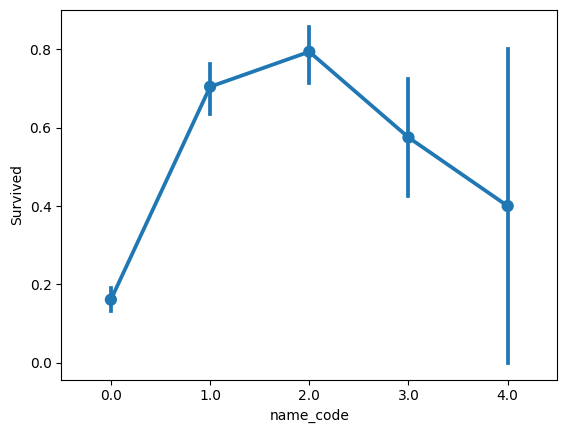

In [63]:
import seaborn as sns
sns.pointplot(x='name_code' , y='Survived', data=train_data) #세로선은 95%의 신뢰구간, 짧을수록 신뢰도가높고 길수록 낮다.
plt.show()

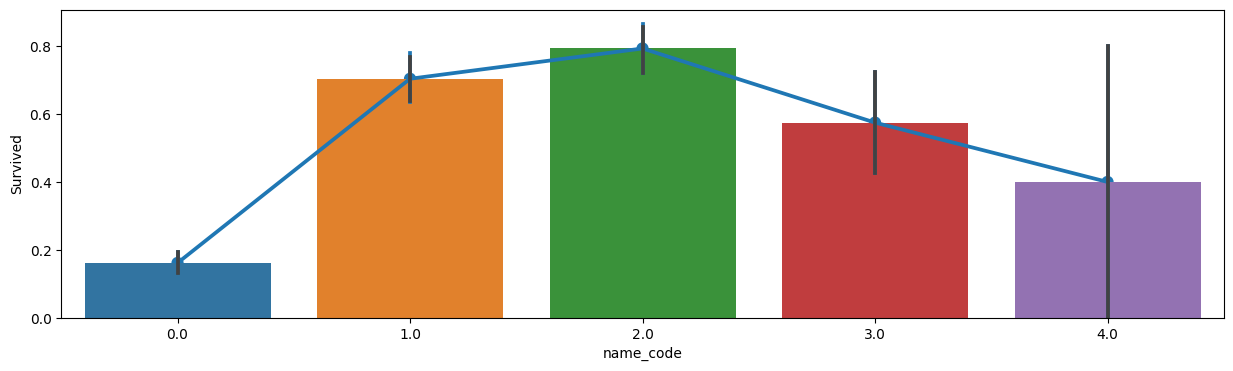

In [58]:
plt.figure(figsize=(15, 4))
sns.pointplot(x='name_code' , y='Survived',data=train_data)
sns.barplot(data=train_data, x="name_code", y="Survived")
plt.show()
# Mr. 이 포함된 이름이 가장 생존률이 낮고, Miss, Mrs. 가 포함된 이름은 생존률이 높은 편이다. 남성, 
#여성을 각각 분리하여 살펴보자.


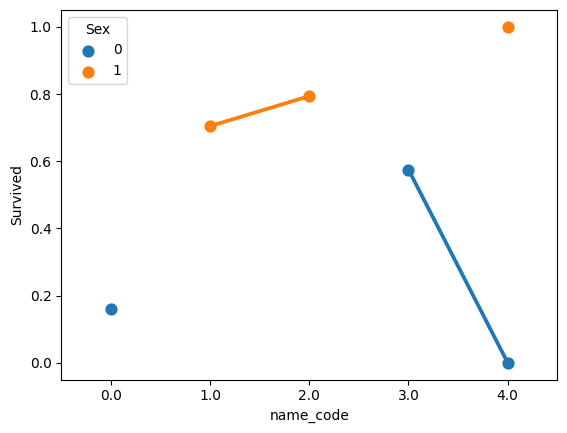

In [71]:
sns.pointplot(x='name_code' , y='Survived' , hue = 'Sex',data=train_data, ci=None)
plt.show()


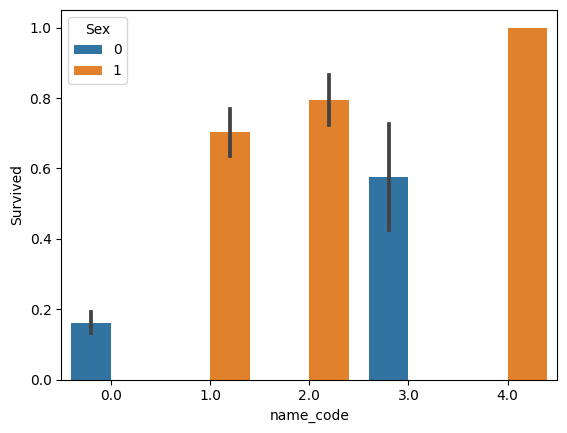

In [74]:
sns.barplot(x='name_code' , y='Survived' , hue = 'Sex', data=train_data)
plt.show()

## crosstab
* crosstab은 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용한다.
* ex) a,b,c,d가 시리즈 데이터일때 pd.crosstab(data.컬럼명1, data.컬럼명2 ...) 이런식, data는 DaraFrame 값

In [76]:
#class별 생존자를 세어보면 아래와 같다. 아래 crosstab 을 보면 1st class 는 생존자가 맋고, 3rd class 는
#사망자가 많음을 볼 수 있다.

pd.crosstab(train_data.Pclass,train_data.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


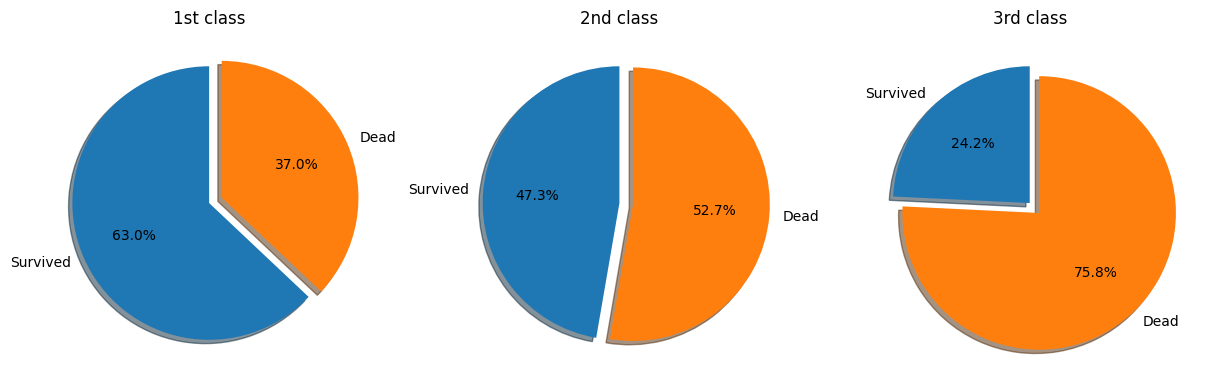

In [78]:
labels = 'Survived', 'Dead'
sizes_1 = [len(train_data.loc[ (train_data["Pclass"]==1) & (train_data["Survived"]==1)]), 
 len(train_data.loc[ (train_data["Pclass"]==1)& (train_data["Survived"]==0)]) ]

# 1등석에 탄사람중 살아남은 사람의 수(LEN) 와 1등석에 탄사람중 죽은사람의 수의 길이(labels에 survived와 dead가 있음)

sizes_2 = [len(train_data.loc[ (train_data["Pclass"]==2) & (train_data["Survived"]==1)]), 
 len(train_data.loc[ (train_data["Pclass"]==2)& (train_data["Survived"]==0)]) ]

# 2등석에 탄사람중 살아남은 사람의 수(LEN) 와 2등석에 탄사람중 죽은사람의 수의 길이(labels에 survived와 dead가 있음)

sizes_3 = [len(train_data.loc[ (train_data["Pclass"]==3) & (train_data["Survived"]==1)]), 
 len(train_data.loc[ (train_data["Pclass"]==3)& (train_data["Survived"]==0)]) ]

# 3등석에 탄사람중 살아남은 사람의 수(LEN) 와 3등석에 탄사람중 죽은사람의 수의 길이(labels에 survived와 dead가 있음)

explode = (0, 0.1) 

fig = plt.figure()
fig.set_size_inches(15,5)

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class') 

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('2nd class')

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.set_title('3rd class') 

plt.show()


In [79]:
pd.crosstab([train_data.Pclass,train_data.Sex],train_data.Survived,margins=True).style.background_gradient(cmap='summer_r')
